<a href="https://colab.research.google.com/github/BPavanVenkataSai/Cloud_Counselage_Data_Project/blob/main/Data_Analystics_project_Pavan_Venkata_Sat_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'/content/Data analyst Data.csv')

In [3]:
# Find the number of unique students based on a unique identifier, such as Email ID
unique_students = data['Email ID'].nunique()
unique_students

2157

In [4]:
# Calculate the average GPA of the students
average_gpa = data['CGPA'].mean()
average_gpa

8.038475684511647

In [5]:
# Calculate the distribution of students across graduation years
graduation_year_distribution = data['Year of Graduation'].value_counts().sort_index()
graduation_year_distribution

Year of Graduation
2023    1536
2024    1511
2025    1292
2026     555
Name: count, dtype: int64

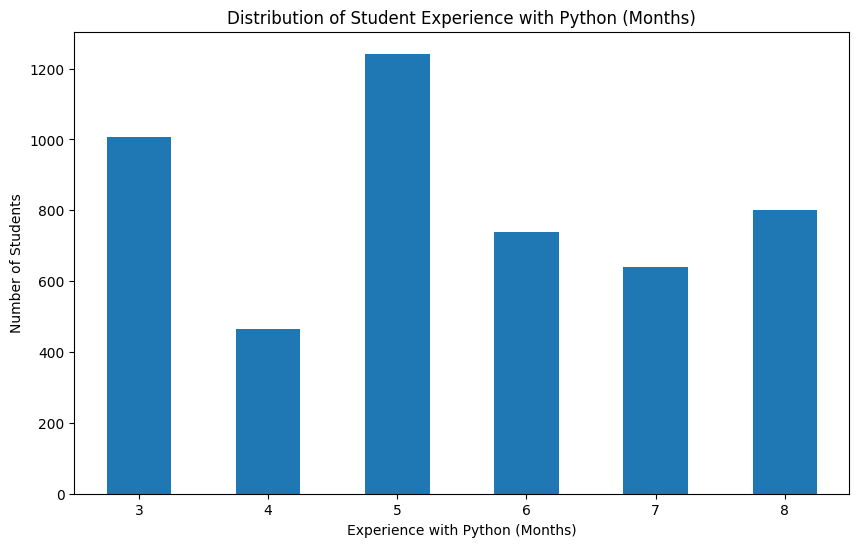

In [6]:
# Group by 'Experience with python (Months)' and count the number of students for each experience level
experience_distribution = data['Experience with python (Months)'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
experience_distribution.plot(kind='bar')
plt.title('Distribution of Student Experience with Python (Months)')
plt.xlabel('Experience with Python (Months)')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

In [7]:
# Define the mapping for family income categories
income_mapping = {
    '0-2 Lakh': 1,
    '2-5 Lakh': 3.5,
    '5-7 Lakh': 6,
    '7 Lakh+': 7
}

# Apply the mapping to the 'Family Income' column to convert it to numerical values
data['Family Income Numeric'] = data['Family Income'].map(income_mapping)

# Calculate the average family income
average_family_income = data['Family Income Numeric'].mean()
average_family_income


1.2930118512464241

In [8]:
# Group by 'College Name' and calculate the mean GPA
college_gpa = data.groupby('College Name')['CGPA'].mean()

# Sort the results
college_gpa_sorted = college_gpa.sort_values(ascending=False)

print(college_gpa_sorted)

College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
MIT Academy Of Engineering ,Alandi                                                   8.282353
D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKURDI PUNE                                8.266667
Don Bosco College of Engineering Fatorda Goa                                         8.232143
Vidyalankar Institute of Technology, Mumbai                                          8.196078
Silicon Institute of Technology                                                      8.150000
New horizon institute of Technology and Managem

In [9]:
# Sort the colleges by average GPA in descending order and select the top 5
top_5_colleges = college_gpa.sort_values(ascending=False).head(5)

top_5_colleges

College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64

In [10]:
# Group by 'City' and calculate the average GPA for each group
city_gpa = data.groupby('City')['CGPA'].mean()

city_gpa

City
Agartala     7.660714
Agra         8.046429
Ahemdabad    8.190385
Ajmer        8.284314
Akola        8.021429
               ...   
Vidisha      7.738095
Vijaywada    7.986364
Wardha       8.328571
konark       8.071429
kullu        7.878571
Name: CGPA, Length: 177, dtype: float64

Correlation coefficient between family income and GPA: 0.015311266885362971


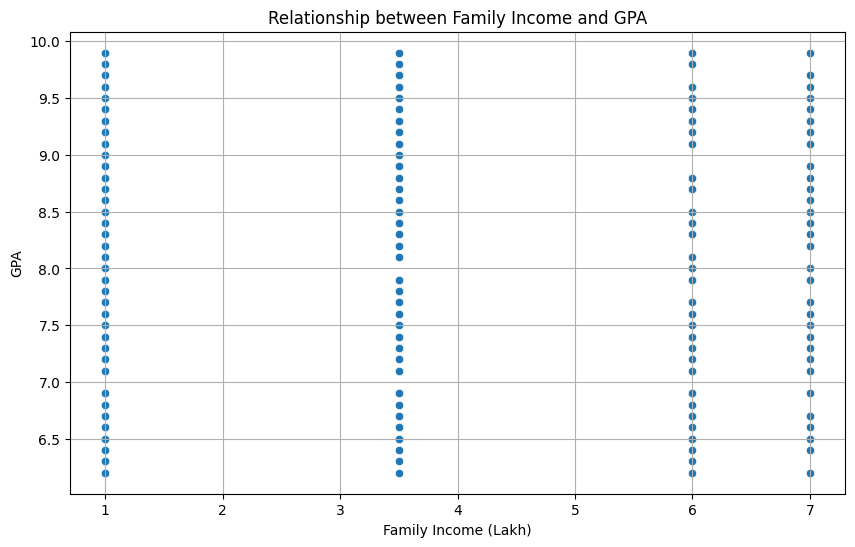

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the mapping for family income categories
income_mapping = {
    '0-2 Lakh': 1,
    '2-5 Lakh': 3.5,
    '5-7 Lakh': 6,
    '7 Lakh+': 7
}

# Apply the mapping to the 'Family Income' column to convert it to numerical values
data['Family Income Numeric'] = data['Family Income'].map(income_mapping)

# Calculate the correlation coefficient between family income and GPA
correlation = data['Family Income Numeric'].corr(data['CGPA'])
print(f"Correlation coefficient between family income and GPA: {correlation}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Family Income Numeric', y='CGPA', data=data)
plt.title('Relationship between Family Income and GPA')
plt.xlabel('Family Income (Lakh)')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

In [12]:
import statsmodels.api as sm

# Convert categorical 'Family Income' to numerical values
income_mapping = {
    '0-2 Lakh': 1,
    '2-5 Lakh': 3.5,
    '5-7 Lakh': 6,
    '7 Lakh+': 7
}
data['Family Income Numeric'] = data['Family Income'].map(income_mapping)

# Select the relevant columns for the regression model
X = data[['CGPA', 'Family Income Numeric', 'Experience with python (Months)']]
y = data['Expected salary (Lac)']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Expected salary (Lac)   R-squared:                       0.047
Model:                               OLS   Adj. R-squared:                  0.047
Method:                    Least Squares   F-statistic:                     81.24
Date:                   Mon, 29 Jul 2024   Prob (F-statistic):           2.77e-51
Time:                           04:54:11   Log-Likelihood:                -15949.
No. Observations:                   4894   AIC:                         3.191e+04
Df Residuals:                       4890   BIC:                         3.193e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.9474      0.787      2.474      0.013       0.404       3.490
CGPA                                1.1703      0.090     13.060      0.000       0.995       1.346
Family Income Numeric               0.1554      0.081      1.913      0.056      -0.004       0.315
Experience with python (Months)     0.4411      0.053      8.342      0.000       0.337       0.545
==============================================================================
Omnibus:                      570.265   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.673
Skew:                           0.442   Prob(JB):                     4.61e-64
Kurtosis:                       2.194   Cond. No.                         87.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Group by 'Events' and 'College Name' and count the number of students
event_field_distribution = data.groupby(['Events', 'College Name']).size().reset_index(name='Student Count')

# Sort the data to find which events attract more students from specific colleges
event_field_distribution_sorted = event_field_distribution.sort_values(by=['Events', 'Student Count'], ascending=[True, False])

# Display the top results
event_field_distribution_sorted.head(20)  # Display the top 20 results

,Events,College Name,Student Count
11,Art of Resume Building,"LD College of engineering, Ahmedabad, Gujarat",20
17,Art of Resume Building,"Priyadarshini college of engineering, Nagpur",17
0,Art of Resume Building,A. C. Patil College of Engineering,15
3,Art of Resume Building,"B. K. Birla College of Arts, Science & Commerc...",15
6,Art of Resume Building,DKTE Society's Textile And Engineering Institu...,15
8,Art of Resume Building,G H Raisoni institut of engineering and techno...,15
9,Art of Resume Building,GOVERNMENT POLYTECHNIC GANDHINAGAR,15
24,Art of Resume Building,"Vidyalankar Institute of Technology, Mumbai",15
26,Art of Resume Building,Wilson college,15
10,Art of Resume Building,"KLE Society's College of BCA, RLS Institute, B...",14


In [14]:
# Separate the students into two groups based on their leadership skills
leadership_yes = data[data['Leadership- skills'] == 'yes']
leadership_no = data[data['Leadership- skills'] == 'no']

# Calculate the average GPA and expected salary for each group
average_gpa_leadership_yes = leadership_yes['CGPA'].mean()
average_gpa_leadership_no = leadership_no['CGPA'].mean()

average_salary_leadership_yes = leadership_yes['Expected salary (Lac)'].mean()
average_salary_leadership_no = leadership_no['Expected salary (Lac)'].mean()

# Display the results
{
    'Average GPA - Leadership Yes': average_gpa_leadership_yes,
    'Average GPA - Leadership No': average_gpa_leadership_no,
    'Average Salary - Leadership Yes': average_salary_leadership_yes,
    'Average Salary - Leadership No': average_salary_leadership_no
}

{'Average GPA - Leadership Yes': 8.036787247087677,
 'Average GPA - Leadership No': 8.040444274224436,
 'Average Salary - Leadership Yes': 13.971796443899448,
 'Average Salary - Leadership No': 13.795097663730372}

In [15]:
# Filter the data to include only students graduating by the end of 2024
students_graduating_2024 = data[data['Year of Graduation'] <= 2024]

# Count the number of students graduating by the end of 2024
num_students_graduating_2024 = students_graduating_2024.shape[0]
print(f"Number of students graduating by the end of 2024: {num_students_graduating_2024}")

Number of students graduating by the end of 2024: 3047


In [17]:
# Filter events related to Data Science
# Assuming the 'Events' column contains the event names and Data Science events can be identified by a keyword
data_science_events = data[data['Events'].str.contains('Data Science', case=False, na=False)]

# Count the number of unique students who attended Data Science events
unique_students_data_science = data_science_events['Email ID'].nunique()

print(f"Total number of students who attended Data Science events: {unique_students_data_science}")

Total number of students who attended Data Science events: 218


In [18]:
# Define criteria for high CGPA and more experience
high_cgpa_threshold = data['CGPA'].quantile(0.75)  # Top 25% for CGPA
high_experience_threshold = data['Experience with python (Months)'].quantile(0.75)  # Top 25% for experience

# Filter the dataset based on the criteria
high_cgpa_experience = data[
    (data['CGPA'] >= high_cgpa_threshold) &
    (data['Experience with python (Months)'] >= high_experience_threshold)
]

# Calculate the average expected salary for the filtered group
average_expected_salary_high_cgpa_experience = high_cgpa_experience['Expected salary (Lac)'].mean()

print(f"Average expected salary for students with high CGPA and more experience: {average_expected_salary_high_cgpa_experience}")

Average expected salary for students with high CGPA and more experience: 20.64756446991404


In [21]:
# Filter students who learned about the event from their colleges
students_from_college = data[data['How did you come to know about this event?'].str.contains('College', case=False, na=False)]

# Group by 'College Name' and count the number of students
college_participation_count = students_from_college.groupby('College Name').size().reset_index(name='Student Count')

# Sort the data to find the top 5 colleges
top_5_colleges = college_participation_count.sort_values(by='Student Count', ascending=False).head(5)

# Display the results
top_5_colleges

,College Name,Student Count
46,"vidyalankar institute of technology, mumbai",23
35,"mit academy of engineering ,alandi",23
31,"kle society's college of bca, rls institute, b...",23
39,"priyadarshini college of engineering, nagpur",20
33,"ld college of engineering, ahmedabad, gujarat",20


In [22]:
# Group by 'How did you come to know about this event?' and count the number of students
promotion_channel_counts = data.groupby('How did you come to know about this event?').size().reset_index(name='Student Count')

# Sort the data to find the promotion channel with the most student participation
promotion_channel_counts_sorted = promotion_channel_counts.sort_values(by='Student Count', ascending=False)

# Display the results
promotion_channel_counts_sorted

,How did you come to know about this event?,Student Count
46,Whatsapp,1067
5,Email,438
42,SPOC/ College Professor,326
40,Others,153
0,Cloud Counselage Website,129
...,...,...
68,Youtube | Facebook | Instagram | LinkedIn | Wh...,1
27,Instagram | Whatsapp | Email | Others,1
25,Instagram | Whatsapp | Cloud Counselage Website,1
72,Youtube | Facebook | Instagram | LinkedIn | Wh...,1
